## Parte III – Validação Holdout em Problema Não-Linearmente Separável
### Redes Neurais Artificiais - PP2
### Autor: Dayvson Silva - 1915310007
### Data: 05/09/2020

Esta tarefa consistiu em aplicar o percetron de Rosenblatt em uma tarefa Não-linearmente Separável, O primeiro passo foi implementar o percetron em Forma de classe para que a sua ultização posterior tivesse mais clareza. No primeiro momento foi plotado em um  Scatter plot o conjunto de dados, para se comprovar que se tratava de um problema não-linear.

## Importando as bibliotecas usadas na tarefa

In [201]:
import random
import numpy as np
from matplotlib import pyplot as plt


## Lendo os dados do arquivo dataHoldout.txt

Ao realizar a leitura é todos os exemplos das entradas estão em uma mesma dimensão por isso, foi realizado um reshape no conjunto de dados.

In [4]:
dataset = np.fromfile('../dados/dataHoldout.txt')
number_instances = dataset.shape[0] // 3 ## 3 é quantidade de colunas
dataset = dataset.reshape(number_instances, 3)
dataset

array([[-0.29322959, -0.09065359,  1.        ],
       [ 0.07988839,  0.21101297,  1.        ],
       [-0.07825563, -0.08083512,  1.        ],
       ...,
       [ 0.65980493,  1.05876739,  0.        ],
       [ 1.09867123,  0.87404891,  0.        ],
       [ 0.72930655,  0.93224271,  0.        ]])

Imprimindo o cojunto de dados para identificar como os dados estão distribuidos, com a impressão fica claro que os dados são estão dispostos como um problema linear.

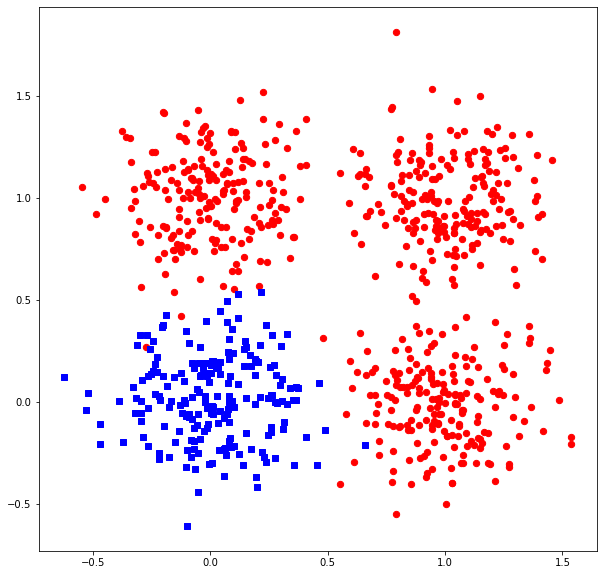

In [50]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1,1,1)
x = dataset[:,0][dataset[:, 2] == 0.0] # seleciona colunas 0 e targe 0
y = dataset[:,1][dataset[:, 2] == 0.0] # seleciona colunas 1 e targe 0
ax.scatter(x, y, c='r', s=40, marker='o', label='0')
x = dataset[:,0][dataset[:, 2] == 1.0] # seleciona colunas 0 e targe 1
y = dataset[:,1][dataset[:, 2] == 1.0] # seleciona colunas 1 e targe 1
ax.scatter(x, y, c='b', s=40, marker='s', label='0')
plt.show()

Tentando usar uma curva para limitar os dois grupos dentro do conjuto de dados.

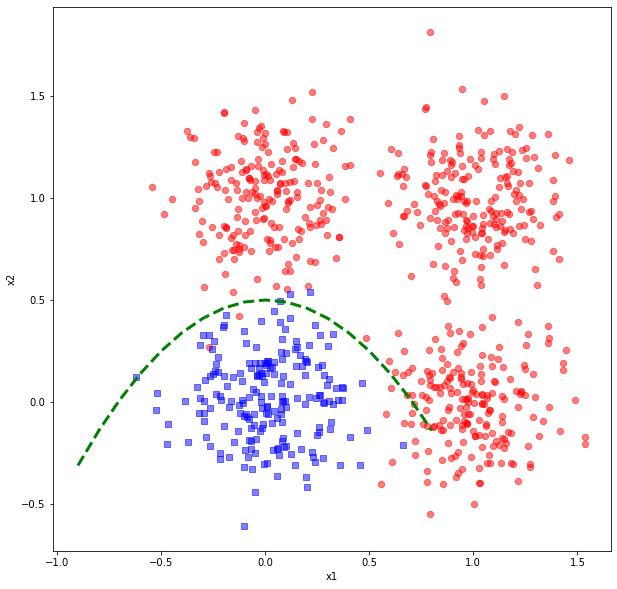

In [197]:
def decision_boundary(x_1):
    """ Calculates the x_2 value for plotting the decision boundary."""
    #return 4 - np.sqrt(-x_1**2 + 4*x_1 + 6 + np.log(16))
    return -x_1**2 + x_1/2000 + 0.5

# Main scatter plot and plot annotation
f, ax = plt.subplots(figsize=(10, 10))
ax.scatter(dataset[:,0][dataset[:,2] == 0.0], dataset[:,1][dataset[:,2] == 0.0], marker='o', color='red', s=40, alpha=0.5)
ax.scatter(dataset[:,0][dataset[:,2] == 1.0], dataset[:,1][dataset[:,2] == 1.0], marker='s', color='blue', s=40, alpha=0.5)
#plt.title('Densities of 2 classes with 25 bivariate random patterns each')
plt.ylabel('x2')
plt.xlabel('x1')

# Adding decision boundary to plot
x_1 = np.arange(-0.9, 0.9, 0.1) #np.array([-.7, .0, .5, .6, .7, .8, 1])
bound = decision_boundary(x_1)
plt.plot(x_1, bound, 'g--', lw=3)
plt.show()

In [ ]:
#TODO: criar uma função de fronteira que delimite a os grupos

In [218]:
print(random.choices(dataset.tolist())

TypeError: 'int' object is not iterable

In [235]:
len(dataset)*0.9

def train_test(dataset, percent):
    train = random.choices(dataset.tolist(), k=int(len(dataset)*percent)))
    test = 
train_test(dataset, 0.1)

[[0.25776182948177434, 0.03455124939232867, 1.0], [0.10944286799495002, 0.9754250705678246, 0.0], [1.2540959647432284, 1.2450117165129504, 0.0], [0.07187885643899004, 1.0687378699300176, 0.0], [0.2085154692451545, 0.875221078521973, 0.0], [-0.04584079895499063, 0.05106109699613635, 1.0], [-0.04148641591771479, 0.9991398463118832, 0.0], [0.8911845641000474, 1.1014147264186664, 0.0], [0.05786482978974894, -0.36451413953575607, 1.0], [0.9543150145474685, 0.982796860931318, 0.0], [0.191107010689555, 0.21058660157930642, 1.0], [0.2636172458291166, 0.9919573443872003, 0.0], [-0.2932295873131307, -0.09065358981762574, 1.0], [0.0994431492077371, 1.0330745417822051, 0.0], [0.3260699520852064, 0.33196305060683357, 1.0], [-0.17369551805062536, -0.025724431145319783, 1.0], [0.011499804310926717, -0.05939114462951792, 1.0], [1.2036251850751662, 1.0381889402252582, 0.0], [0.005316340891719427, -0.05266984864113862, 1.0], [-0.10259311123976798, -0.06961392752371162, 1.0], [1.365177057914436, -0.02488